In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user_engage = pd.read_csv('../input/relax-datachallenge/takehome_user_engagement.csv')
users = pd.read_csv('../input/relax-datachallenge/takehome_users.csv', encoding='latin-1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
user_engage['time_stamp'] = pd.to_datetime(user_engage['time_stamp'])
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
user_engage_weekly = user_engage.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')])['visited'].sum().reset_index()
user_engage_weekly.head()

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-12-01,1
3,2,2013-12-15,1
4,2,2013-12-29,1


In [7]:
# there are 33859 "adopted users"
user_engage_weekly[user_engage_weekly['visited'] >= 3]

,user_id,time_stamp,visited
7,2,2014-02-09,3
23,10,2013-03-03,3
29,10,2013-04-14,3
31,10,2013-04-28,3
32,10,2013-05-05,4
...,...,...,...
68784,11988,2014-04-06,3
68788,11988,2014-05-04,4
68790,11988,2014-05-18,3
68791,11988,2014-05-25,5


In [8]:
user_engage_weekly = user_engage_weekly.groupby('user_id').apply(lambda x: x.sort_values('visited', ascending=False)).drop('user_id', axis=1).reset_index(level='user_id')
user_engage_weekly.drop_duplicates(subset='user_id', keep='first', inplace=True)

In [9]:
# merge the dataframe with visited count with the users dataframe
df = user_engage_weekly.merge(users, how='right', left_on='user_id', right_on='object_id')
df.head()

,user_id,time_stamp,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.0,2014-04-27,1.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2.0,2014-02-09,3.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3.0,2013-03-24,1.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4.0,2013-05-26,1.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5.0,2013-01-27,1.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
df['visited'].value_counts()

1.0    6820
2.0     558
7.0     488
3.0     280
5.0     234
6.0     222
4.0     221
Name: visited, dtype: int64

In [11]:
df.sample(100)

,user_id,time_stamp,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
4838,4839.0,2012-09-16,3.0,4839,2012-06-29 19:08:56,Ravn Sarah,SarahARavn@gmail.com,PERSONAL_PROJECTS,1.348082e+09,1,0,331,NaN
9025,9026.0,2012-06-24,1.0,9026,2012-06-23 05:48:01,Frederiksen Bente,BenteMFrederiksen@gmail.com,GUEST_INVITE,1.340430e+09,0,0,47,5340.0
11067,NaN,NaT,NaN,11068,2014-02-07 06:33:21,Poulsen Amanda,dbuxhpcr@ckslb.com,ORG_INVITE,NaN,1,1,309,11398.0
4962,NaN,NaT,NaN,4963,2013-04-02 14:55:40,Hancock Peter,PeterHancock@gmail.com,ORG_INVITE,NaN,0,0,376,7753.0
6627,6628.0,2012-10-28,1.0,6628,2012-10-23 19:25:12,Jones Patty,PattyKJones@hotmail.com,ORG_INVITE,1.351020e+09,0,0,248,7437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,NaN,NaT,NaN,3127,2013-02-14 02:10:23,Dean Luca,LucaDean@cuvox.de,ORG_INVITE,NaN,1,0,2,7205.0
8578,8579.0,2014-05-04,1.0,8579,2014-05-03 12:21:07,Brandt Andrea,AndreaNBrandt@hotmail.com,SIGNUP,1.401452e+09,0,0,269,NaN
4337,4338.0,2013-03-31,1.0,4338,2013-03-27 20:16:22,Clausen Nicklas,NicklasCClausen@gmail.com,SIGNUP_GOOGLE_AUTH,1.364588e+09,0,0,7,NaN
2146,2147.0,2012-07-29,1.0,2147,2012-07-23 02:00:14,Leary Edward,EdwardFLeary@jourrapide.com,ORG_INVITE,1.343009e+09,0,0,15,11145.0


In [12]:
# there are only 8823 values in 'visited' so need to replace 3177 NaN values with 0 because those users did not visit the website
df['visited'] = df['visited'].replace(np.nan, 0)
df['last_session_creation_time'] = df['last_session_creation_time'].replace(np.nan, 0)

In [13]:
df['visited'].value_counts()

1.0    6820
0.0    3177
2.0     558
7.0     488
3.0     280
5.0     234
6.0     222
4.0     221
Name: visited, dtype: int64

In [14]:
# create target variable
df['adopted_user'] = df['visited'].apply(lambda x: 1 if x >= 3 else 0)
df['adopted_user'].value_counts()

0    10555
1     1445
Name: adopted_user, dtype: int64

In [15]:
df = pd.get_dummies(df, prefix='', columns=['creation_source'])
df.head()

,user_id,time_stamp,visited,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,_GUEST_INVITE,_ORG_INVITE,_PERSONAL_PROJECTS,_SIGNUP,_SIGNUP_GOOGLE_AUTH
0,1.0,2014-04-27,1.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2.0,2014-02-09,3.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,3.0,2013-03-24,1.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4.0,2013-05-26,1.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5.0,2013-01-27,1.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler

#df['last_session_creation_time'] = StandardScaler().fit_transform(df['last_session_creation_time'].values.reshape(-1, 1))
df['org_id'] = StandardScaler().fit_transform(df['org_id'].values.reshape(-1, 1))

In [17]:
df.head()

,user_id,time_stamp,visited,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,_GUEST_INVITE,_ORG_INVITE,_PERSONAL_PROJECTS,_SIGNUP,_SIGNUP_GOOGLE_AUTH
0,1.0,2014-04-27,1.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,-1.055082,10803.0,0,1,0,0,0,0
1,2.0,2014-02-09,3.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,-1.135694,316.0,1,0,1,0,0,0
2,3.0,2013-03-24,1.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,-0.386006,1525.0,0,0,1,0,0,0
3,4.0,2013-05-26,1.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,-1.135694,5151.0,0,1,0,0,0,0
4,5.0,2013-01-27,1.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,0.412050,5240.0,0,1,0,0,0,0


In [18]:
X = df[['last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', '_GUEST_INVITE', '_ORG_INVITE', '_PERSONAL_PROJECTS', '_SIGNUP', '_SIGNUP_GOOGLE_AUTH']]

y = df['adopted_user']

Feature: 0, Score: 0.76121
Feature: 1, Score: 0.00932
Feature: 2, Score: 0.00874
Feature: 3, Score: 0.20229
Feature: 4, Score: 0.00386
Feature: 5, Score: 0.00404
Feature: 6, Score: 0.00377
Feature: 7, Score: 0.00336
Feature: 8, Score: 0.00341


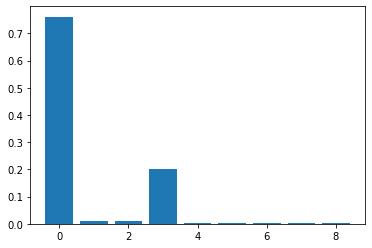

In [19]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier()

rf.fit(X, y)
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.08694
Feature: 1, Score: 0.09459
Feature: 2, Score: 0.16015
Feature: 3, Score: 0.08182
Feature: 4, Score: 0.44843
Feature: 5, Score: 0.04391
Feature: 6, Score: 0.08416


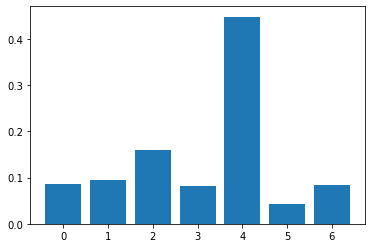

In [20]:
# remove 'last session creation time' and 'org id' to view importance amoung other features
X = df[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', '_GUEST_INVITE', '_ORG_INVITE', '_PERSONAL_PROJECTS', '_SIGNUP', '_SIGNUP_GOOGLE_AUTH']]

y = df['adopted_user']

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier()

rf.fit(X, y)
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()